# Classification Model

Prediction of what kind of crime will happen based on date, time, borough, localisation (outside inside)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

nypd_data = LOAD_DATASET()


C:\Users\User\AppData\Local\Temp\ipykernel_6520\3718060115.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  nypd_data = pd.read_csv('nypd_data.csv')


In [9]:
nypd_data.head()

,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,0,39468181,02/20/2008,07:00:00,02/23/2008,08:00:00,88.0,02/23/2008,107,BURGLARY,...,U,0.0,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,UNKNOWN,25-44,WHITE,F
1,1,50539499,08/21/2008,22:00:00,08/21/2008,23:00:00,19.0,08/22/2008,109,GRAND LARCENY,...,U,0.0,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,UNKNOWN,45-64,WHITE HISPANIC,F
2,2,45223390,04/03/2008,03:35:00,04/03/2008,03:50:00,77.0,04/03/2008,106,FELONY ASSAULT,...,U,0.0,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,UNKNOWN,25-44,BLACK,F
3,3,50594658,08/19/2008,09:00:00,NaN,(null),32.0,08/27/2008,341,PETIT LARCENY,...,U,0.0,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,UNKNOWN,UNKNOWN,UNKNOWN,M
4,4,44451016,03/10/2008,22:00:00,03/10/2008,22:10:00,67.0,03/11/2008,105,ROBBERY,...,M,0.0,40.650142,-73.944674,"(40.650142, -73.944674)",PATROL BORO BKLYN SOUTH,UNKNOWN,25-44,BLACK,M


In [11]:
nypd_data.isna().sum()

Unnamed: 0                 0
CMPLNT_NUM                 0
CMPLNT_FR_DT               0
CMPLNT_FR_TM               0
CMPLNT_TO_DT         1815020
CMPLNT_TO_TM               0
ADDR_PCT_CD                0
RPT_DT                     0
KY_CD                      0
OFNS_DESC                  0
PD_CD                      0
PD_DESC                    0
CRM_ATPT_CPTD_CD           0
LAW_CAT_CD                 0
BORO_NM                    0
LOC_OF_OCCUR_DESC          0
PREM_TYP_DESC              0
JURIS_DESC                 0
JURISDICTION_CODE          0
PARKS_NM                   0
HADEVELOPT                 0
HOUSING_PSA                0
X_COORD_CD                 0
Y_COORD_CD                 0
SUSP_AGE_GROUP             0
SUSP_RACE                  0
SUSP_SEX                   0
TRANSIT_DISTRICT           0
Latitude                   0
Longitude                  0
Lat_Lon                    0
PATROL_BORO                0
STATION_NAME               0
VIC_AGE_GROUP              0
VIC_RACE      

In [7]:
nypd_data.dtypes

Unnamed: 0             int64
CMPLNT_NUM            object
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE      int64
PARKS_NM              object
HADEVELOPT            object
HOUSING_PSA           object
X_COORD_CD           float64
Y_COORD_CD           float64
SUSP_AGE_GROUP        object
SUSP_RACE             object
SUSP_SEX              object
TRANSIT_DISTRICT     float64
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
STATION_NAME          object
VIC_AGE_GROUP         object
VIC_RACE      

In [4]:
nypd_data = nypd_data.dropna(subset=['RPT_DT', 'CMPLNT_FR_TM', 'BORO_NM', 'LOC_OF_OCCUR_DESC', 'Latitude', 'Longitude', 'OFNS_DESC'])


nypd_data_sample = nypd_data.sample(n=100000, random_state=42)

start_date = '2000-01-01'
end_date = '2024-12-31'
nypd_data = nypd_data[(pd.to_datetime(nypd_data['RPT_DT'], errors='coerce') >= start_date) &
                      (pd.to_datetime(nypd_data['RPT_DT'], errors='coerce') <= end_date)]


nypd_data['RPT_DT'] = pd.to_datetime(nypd_data['RPT_DT'], errors='coerce')
nypd_data['CMPLNT_FR_TM'] = pd.to_datetime(nypd_data['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.time


nypd_data = nypd_data.dropna(subset=['RPT_DT', 'CMPLNT_FR_TM'])


nypd_data['Hour'] = nypd_data['CMPLNT_FR_TM'].apply(lambda x: x.hour)
nypd_data['Day'] = nypd_data['RPT_DT'].dt.dayofweek
nypd_data['Month'] = nypd_data['RPT_DT'].dt.month


categorical_features = ['BORO_NM', 'LOC_OF_OCCUR_DESC']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(nypd_data[categorical_features])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
nypd_data = pd.concat([nypd_data, encoded_df], axis=1)


features = ['Hour', 'Day', 'Month', 'Latitude', 'Longitude'] + list(encoded_df.columns)
target = 'OFNS_DESC'


nypd_data_sample = nypd_data.sample(frac=0.1, random_state=42)


X = nypd_data_sample[features]
y = nypd_data_sample[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517:

                                      precision    recall  f1-score   support

                 ADMINISTRATIVE CODE       0.01      0.00      0.00       391
                ADMINISTRATIVE CODES       0.00      0.00      0.00         0
AGRICULTURE & MRKTS LAW-UNCLASSIFIED       0.14      0.05      0.07        20
      ALCOHOLIC BEVERAGE CONTROL LAW       0.06      0.05      0.06        20
               ANTICIPATORY OFFENSES       0.00      0.00      0.00         1
                               ARSON       0.01      0.00      0.00       376
        ASSAULT 3 & RELATED OFFENSES       0.15      0.18      0.16     18465
                     BURGLAR'S TOOLS       0.00      0.00      0.00       106
                            BURGLARY       0.08      0.05      0.06      5990
           CANNABIS RELATED OFFENSES       0.00      0.00      0.00        13
       CHILD ABANDONMENT/NON SUPPORT       0.00      0.00      0.00        17
      CRIMINAL MISCHIEF & RELATED OF       0.19      0.22      

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's check what kind of variable affects the target positive, what negative

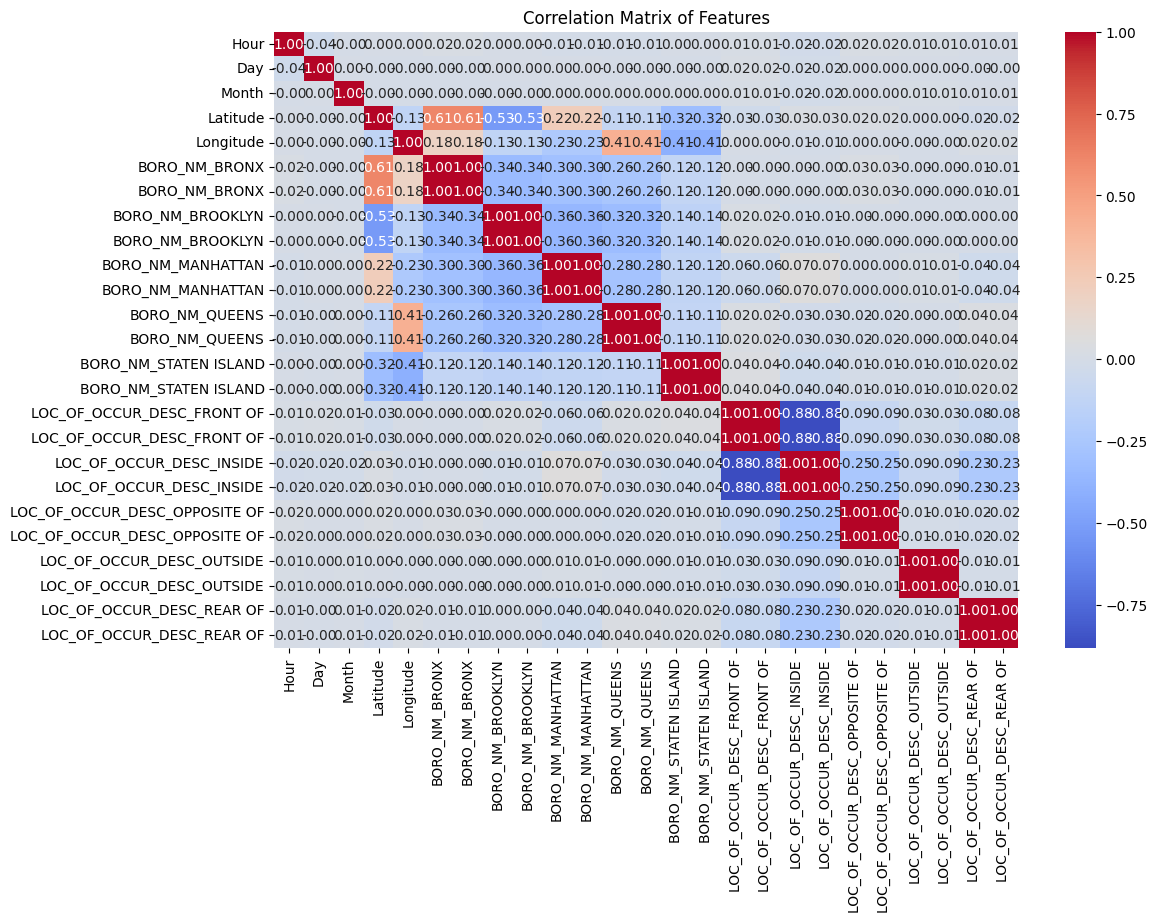

In [10]:
correlation_matrix = nypd_data_sample[features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

We can tell that biggest impact on the kind of crime is the localisation